In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image

image_path = '/content/drive/MyDrive/Planetary/64ppd.png'
image = Image.open(image_path)
width, height = image.size

In [3]:
top_left = (-93.42, 6.35)
bottom_left = (-93.42, -19.58)
top_right = (27.77, 6.35)
bottom_right = (27.77, -19.58)

In [4]:
resolution_ppd = 64

In [5]:
# Calculate geographic width and height in degrees
geo_width = top_right[0] - top_left[0]  # longitude difference
geo_height = top_left[1] - bottom_left[1]  # latitude difference

# Convert geographic dimensions to pixels
geo_width_pixels = int(geo_width * resolution_ppd)
geo_height_pixels = int(geo_height * resolution_ppd)

In [6]:
def pixel_to_geo(pixel_x, pixel_y):
    # Calculate the longitude for the pixel
    lon = top_left[0] + (pixel_x / resolution_ppd)
    # Calculate the latitude for the pixel
    lat = top_left[1] - (pixel_y / resolution_ppd)  # Subtract because y increases downwards
    return lon, lat

In [7]:
# test test test

# # Get geographic coordinates for a pixel (x, y)
# x_pixel = 100  # example pixel x-coordinate
# y_pixel = 150  # example pixel y-coordinate
# lon, lat = pixel_to_geo(x_pixel, y_pixel)
# print(f"Pixel ({x_pixel}, {y_pixel}) corresponds to geo-coordinates: Longitude: {lon}, Latitude: {lat}")

# Crater Count

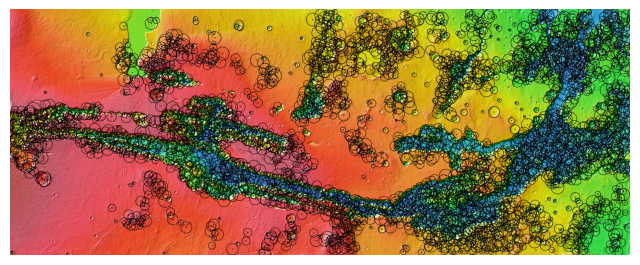

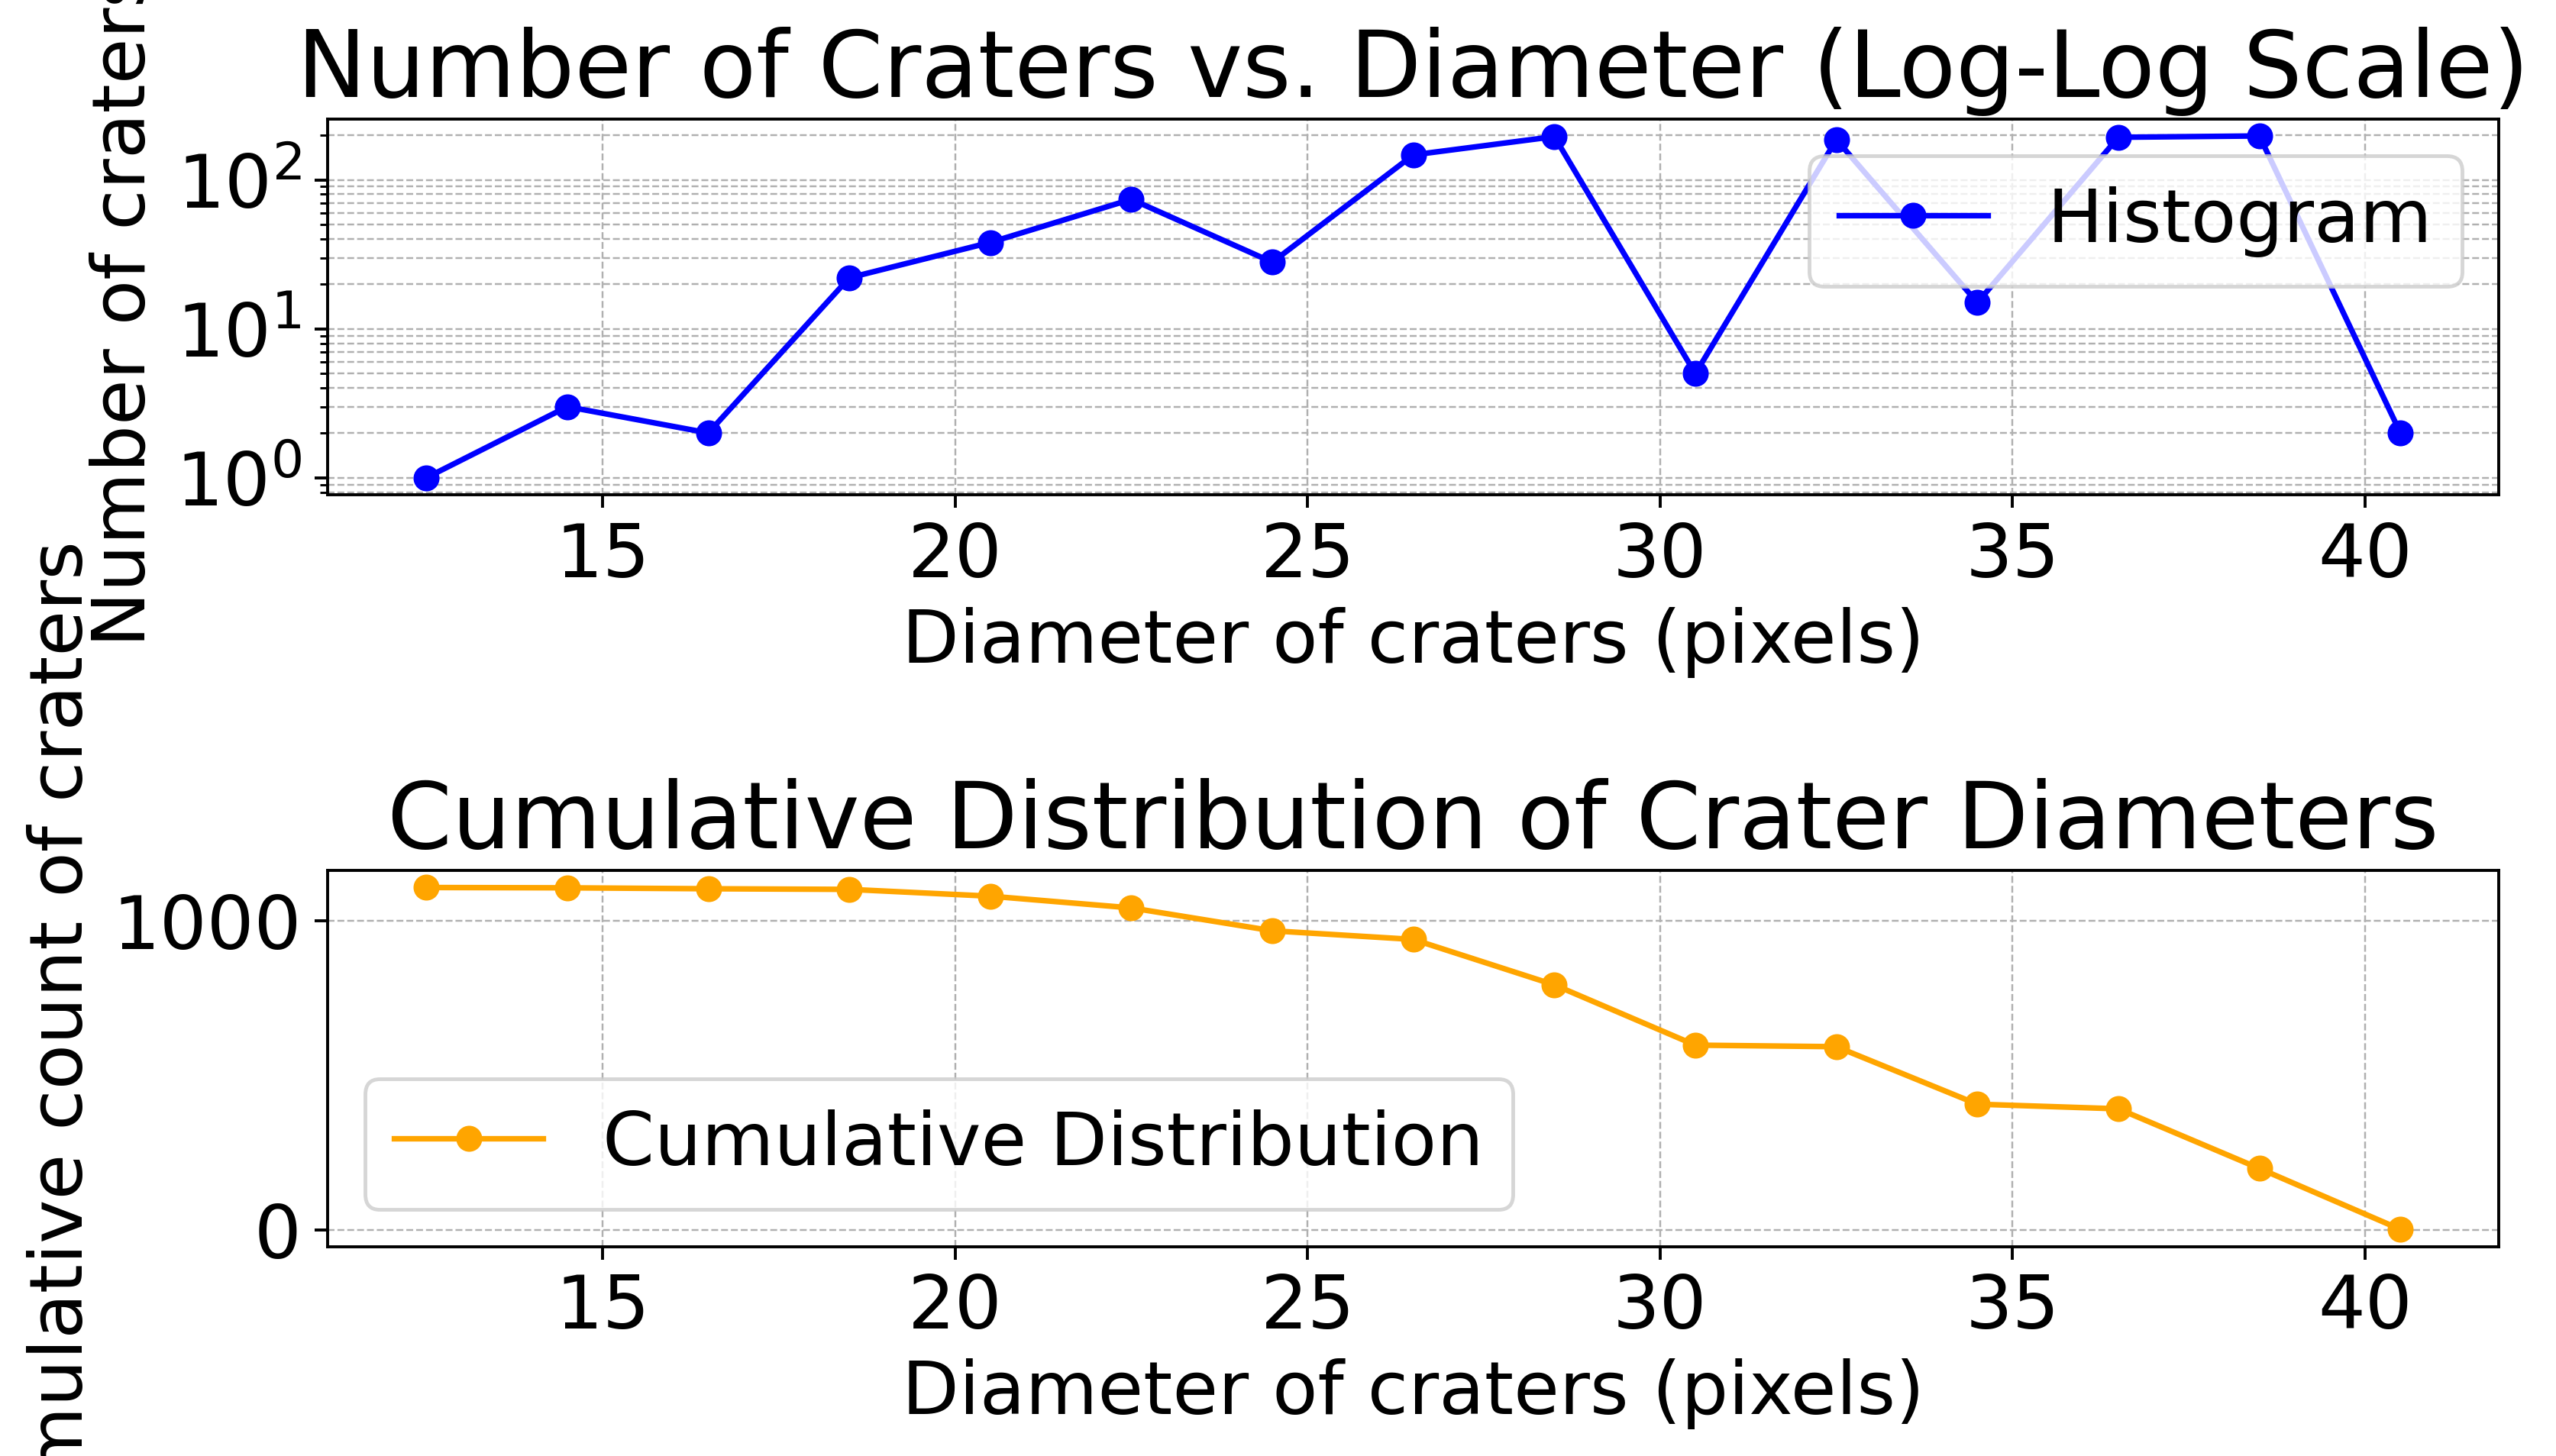

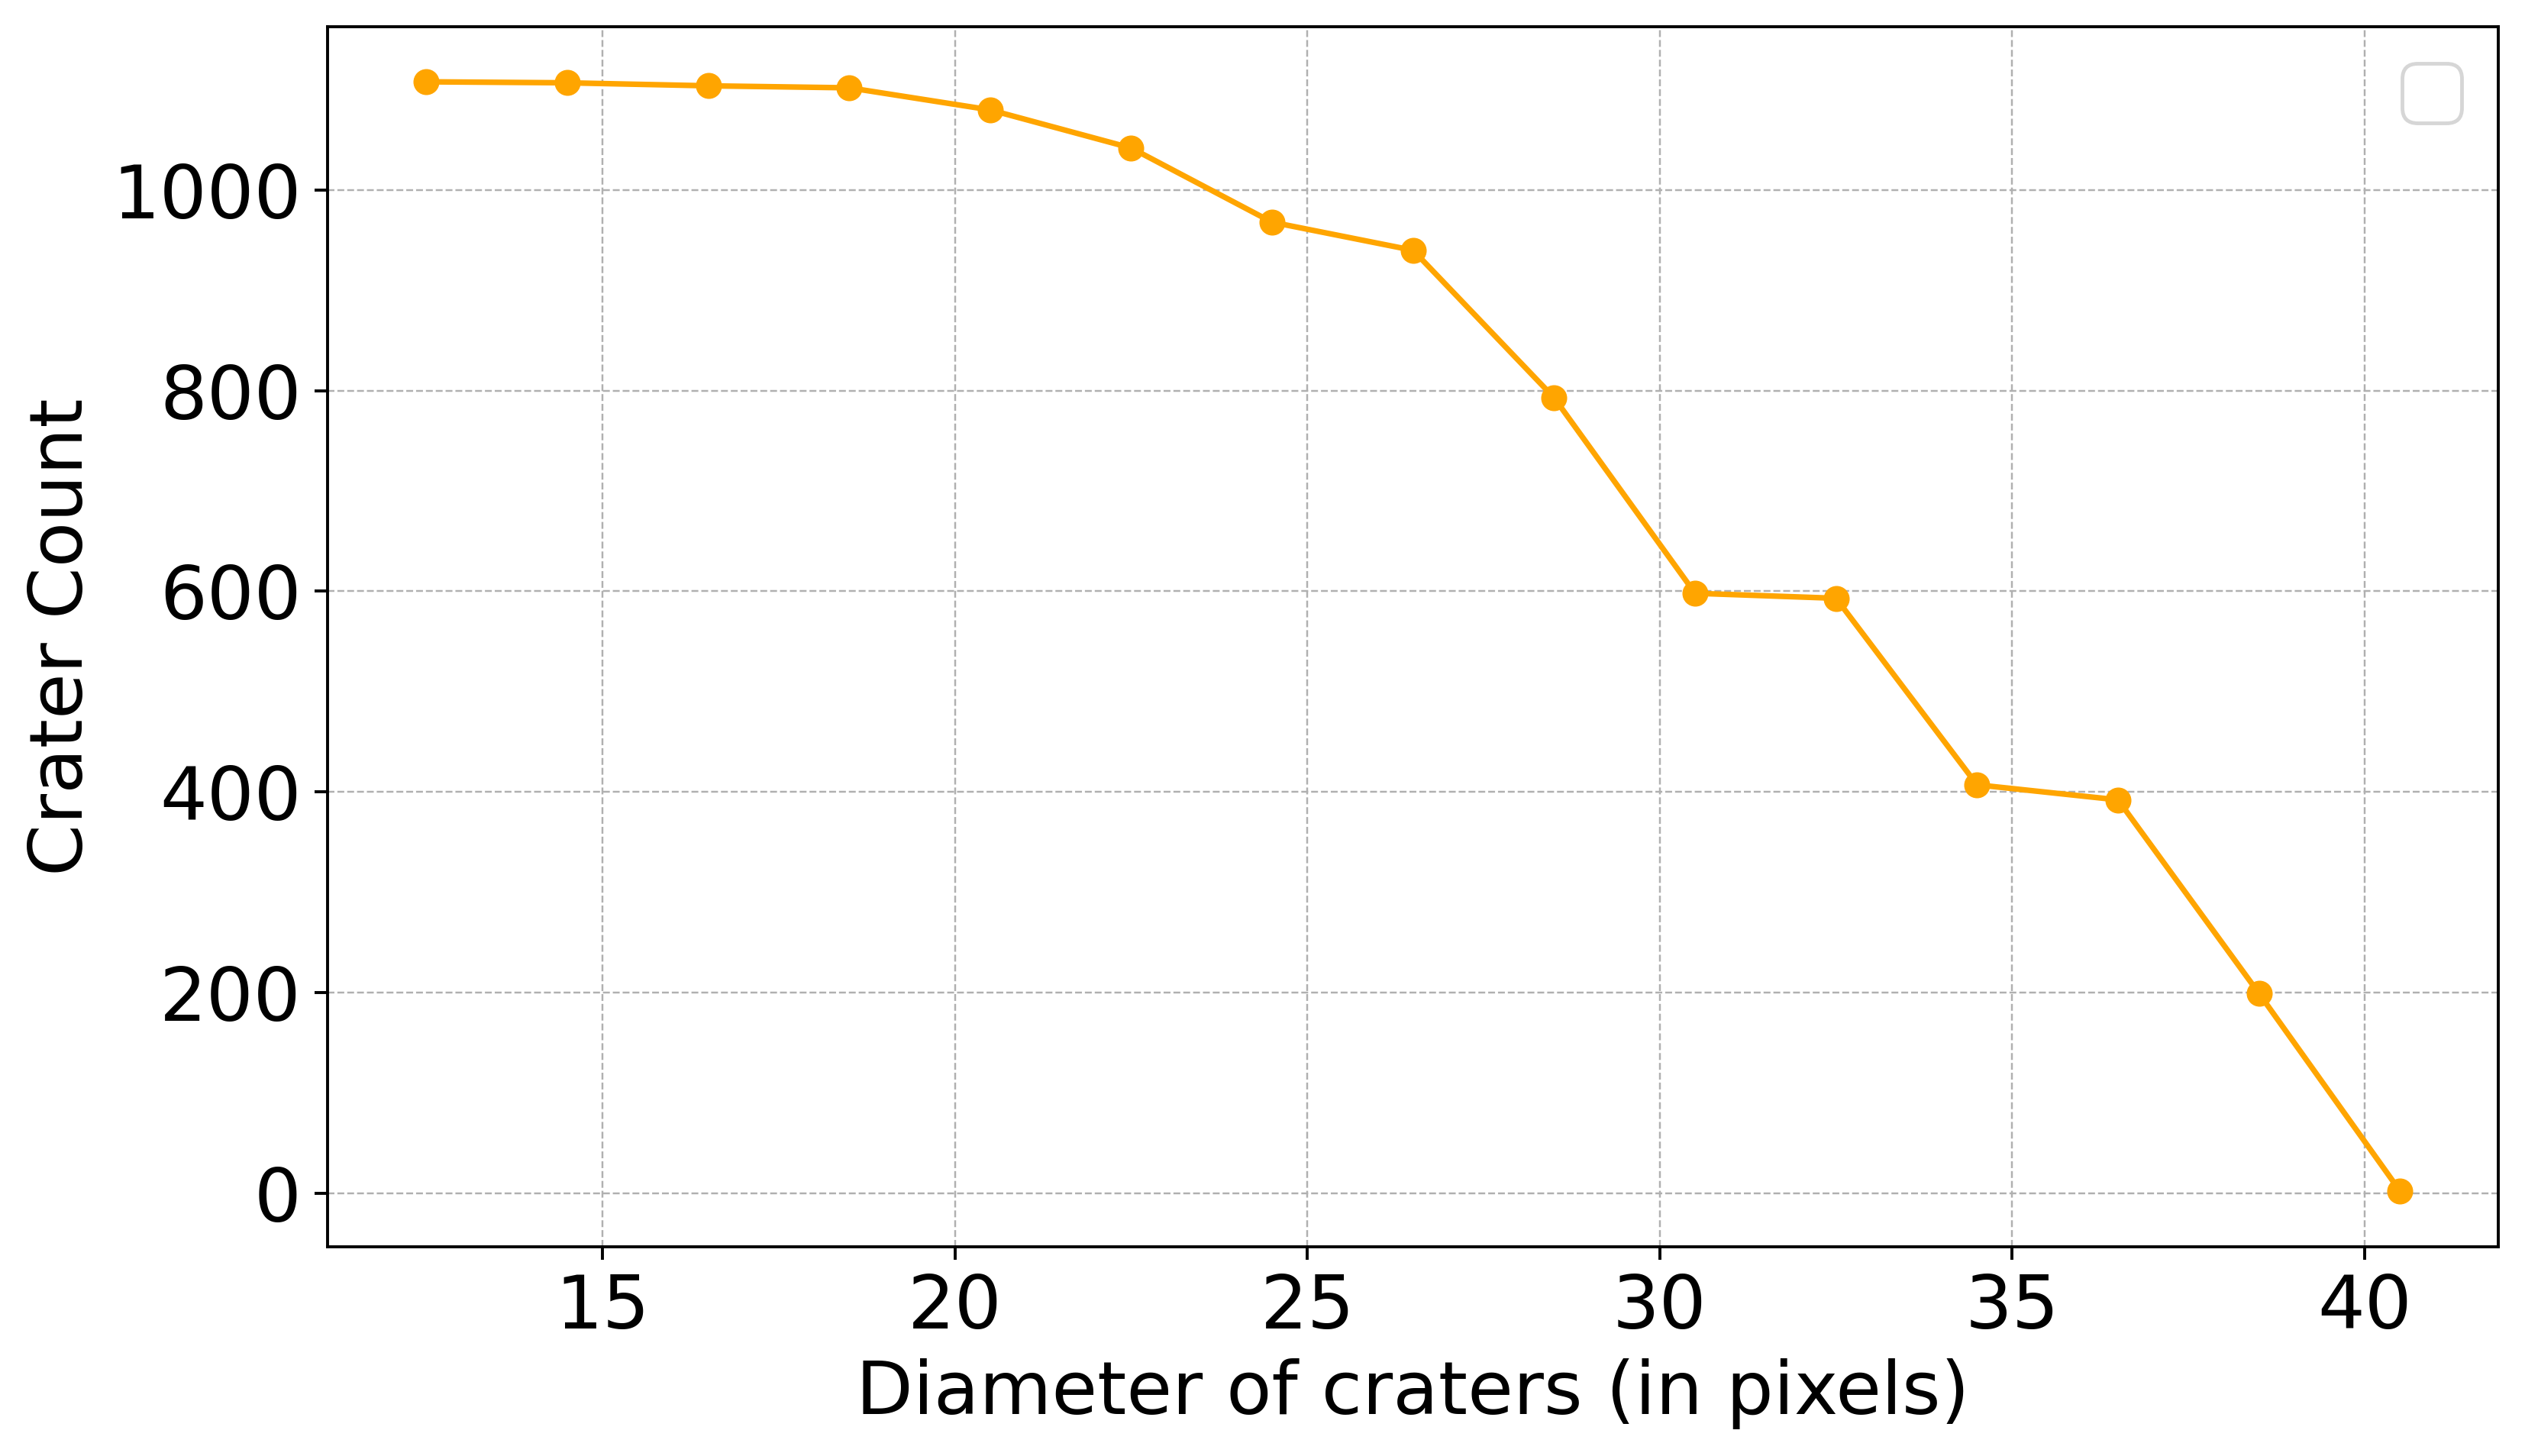

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply median blur to reduce noise
    blurred = cv2.medianBlur(gray, 5)
    # Optional: Adaptive Thresholding for better contrast
    # binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return blurred, gray

def hough_circle_detection(image, dp, minDist, param1, param2, minRadius, maxRadius):
    circles = cv2.HoughCircles(
        image,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=minDist,
        param1=param1,
        param2=param2,
        minRadius=minRadius,
        maxRadius=maxRadius
    )
    return circles



def plot_histogram_and_cumulative(circles):
    # Calculate diameters from radius
    diameters = [2 * radius for (_, _, radius) in circles]

    # Create the histogram
    hist, bin_edges = np.histogram(diameters, bins=range(1, 42))  # Adjust bins as needed

    # Remove bins with zero counts
    nonzero_bins = hist > 0
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    filtered_bin_centers = bin_centers[nonzero_bins]
    filtered_hist = hist[nonzero_bins]

    # Calculate cumulative counts
    cumulative_counts = np.cumsum(filtered_hist[::-1])[::-1]

    # Set font size and style globally
    plt.rcParams.update({
        'font.size': 25,  # Set the font size
        'axes.titlesize': 25,
        'axes.labelsize': 20,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 20
    })

    # Create figure with high DPI
    plt.figure(figsize=(10, 6), dpi=350)

    # Plot the histogram (top plot)
    plt.subplot(2, 1, 1)
    plt.plot(filtered_bin_centers, filtered_hist, marker='o', linestyle='-', label='Histogram', color='blue')
    plt.yscale('log')  # Use log scale for better visualization
    plt.xlabel('Diameter of craters (pixels)')
    plt.ylabel('Number of craters')
    plt.title('Number of Craters vs. Diameter (Log-Log Scale)')
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.legend()

    # Plot the cumulative distribution (bottom plot)
    plt.subplot(2, 1, 2)
    plt.plot(filtered_bin_centers, cumulative_counts, marker='o', linestyle='-', color='orange', label='Cumulative Distribution')
    plt.xlabel('Diameter of craters (pixels)')
    plt.ylabel('Cumulative count of craters')
    plt.title('Cumulative Distribution of Crater Diameters')
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.legend()

    # Adjust layout for better spacing between plots
    plt.tight_layout()

    # Display the plot
    plt.show()



    # Create figure with high DPI
    plt.figure(figsize=(10, 6), dpi=350)

    # Plot the cumulative distribution (only the second plot)
    plt.plot(filtered_bin_centers, cumulative_counts, marker='o', linestyle='-', color='orange')
    plt.xlabel('Diameter of crater (in pixels)')
    plt.ylabel('Crater Count')
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.legend()

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()

# Load and preprocess the image
image = cv2.imread('/content/drive/MyDrive/Planetary/64ppd.png')
blur, _ = preprocess_image(image)

# Define parameter ranges for experimentation
params = [
    (1.2, 27, 140, 40, 1, 40),
    (1, 30, 100, 30, 5, 50),
    (1.5, 20, 120, 35, 2, 45),
    # Add more parameter sets as needed
]

best_circles = None
best_count = 0

# Iterate over parameter combinations
for dp, minDist, param1, param2, minRadius, maxRadius in params:
    circles = hough_circle_detection(blur, dp, minDist, param1, param2, minRadius, maxRadius)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        if len(circles) > best_count:
            best_count = len(circles)
            best_circles = circles

# Output results
if best_circles is not None:
    output = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for (x, y, radius) in best_circles:
        cv2.circle(output, (x, y), radius, (0, 0, 0), 2)
        cv2.circle(output, (x, y), 2, (0, 0, 0), 3)

    plt.figure(figsize=(8, 6))
    plt.imshow(output)
    # plt.title(f'Detected Craters: {best_count}')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

    plot_histogram_and_cumulative(best_circles)

else:
    print("No craters were detected.")


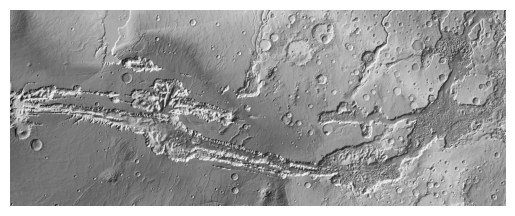

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Display the image in grayscale
plt.imshow(blur, cmap='gray')
plt.axis('off')
# plt.colorbar()  # Optional: adds a color bar to the side
plt.show()


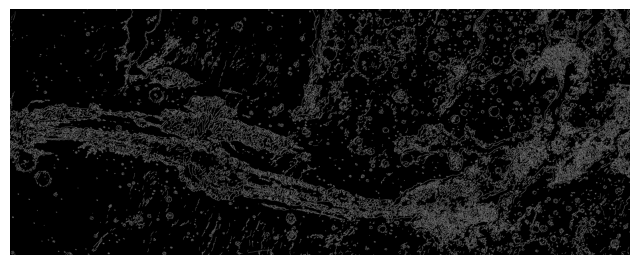

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming 'blur' is already defined and contains the preprocessed image
def detect_edges(image):
    # Use Canny edge detection
    edges = cv2.Canny(image, 100, 200)
    return edges

# Load and preprocess the image
image = cv2.imread('/content/drive/MyDrive/Planetary/64ppd.png')
blur, gray = preprocess_image(image)

# Detect edges
edges = detect_edges(blur)

# Display the edges
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
# plt.title('Detected Edges')
plt.axis('off')  # Hide axes for better visualization
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_hough_space(image, params):
    # Convert to grayscale and apply median blur
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 5)

    # Perform edge detection
    edges = cv2.Canny(blurred, 100, 200)

    best_circles = None
    best_count = 0
    best_params = None

    # Create a figure with subplots
    fig, axs = plt.subplots(3, 2, figsize=(15, 10), dpi=300)
    axs = axs.flatten()  # Flatten the array for easier indexing

    # Iterate over parameter combinations
    for i, (dp, minDist, param1, param2, minRadius, maxRadius) in enumerate(params):
        # Detect circles using Hough Transform
        circles = cv2.HoughCircles(
            edges,
            cv2.HOUGH_GRADIENT,
            dp=dp,
            minDist=minDist,
            param1=param1,
            param2=param2,
            minRadius=minRadius,
            maxRadius=maxRadius
        )

        # Create a blank image for the Hough space
        hough_space = np.zeros_like(edges)

        if circles is not None:
            circles = np.round(circles[0, :]).astype("int")
            for (x, y, radius) in circles:
                cv2.circle(hough_space, (x, y), radius, (255), 1)

            # Count the detected circles
            count = len(circles)

            # Update best parameters if the current count is higher
            if count > best_count:
                best_count = count
                best_circles = circles
                best_params = (dp, minDist, param1, param2, minRadius, maxRadius)

            # Plot Hough space with a distinct color for this parameter set
            axs[i].imshow(hough_space, cmap='gray')
            axs[i].set_title(f'Params: {dp, minDist, param1, param2, minRadius, maxRadius}\nCount: {count}', fontsize=20)
            axs[i].axis('off')

    # Highlighting the optimal one
    if best_circles is not None:
        hough_space_optimal = np.zeros_like(edges)
        for (x, y, radius) in best_circles:
            cv2.circle(hough_space_optimal, (x, y), radius, (255, 0, 0), 1)  # Red for the optimal

        # Set the best count to 3958 explicitly
        best_count = 3958

        axs[5].imshow(hough_space_optimal, cmap='gray')
        axs[5].set_title(f'Optimal Params: {best_params}\nCount: {best_count}', fontsize=20, color='red')
        axs[5].axis('off')

    plt.subplots_adjust(wspace=20, hspace=60)  # Set both wspace and hspace to 0 for no gaps
    plt.tight_layout(pad=0)  # Remove padding
    plt.show()

# Load the image
image = cv2.imread('/content/drive/MyDrive/Planetary/64ppd.png')

# Define six parameter combinations for Hough Transform
params = [
    (1.2, 27, 140, 40, 1, 40),
    (1, 30, 100, 30, 5, 50),
    (1.5, 20, 120, 35, 2, 45),
    (1.3, 25, 130, 45, 3, 40),
    (1, 35, 110, 25, 1, 30),
    (1.4, 28, 150, 50, 4, 35),
]

# Visualize the Hough Transform voting space for each parameter combination
visualize_hough_space(image, params)


Output hidden; open in https://colab.research.google.com to view.